In [1]:
import numpy as np
import pandas as pd
from pylab import plt, mpl
np.random.seed(1000)
plt.style.use('seaborn-v0_8')

In [2]:
url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'

In [4]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)['EUR=']
raw

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
               ...  
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, Length: 2609, dtype: float64

In [5]:
raw.head()

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
Name: EUR=, dtype: float64

In [6]:
raw.tail()

Date
2019-12-26    1.1096
2019-12-27    1.1175
2019-12-30    1.1197
2019-12-31    1.1210
2020-01-01    1.1210
Name: EUR=, dtype: float64

In [7]:
l = raw.resample('1M').last()
l

Date
2010-01-31    1.3862
2010-02-28    1.3625
2010-03-31    1.3510
2010-04-30    1.3295
2010-05-31    1.2305
               ...  
2019-09-30    1.0898
2019-10-31    1.1150
2019-11-30    1.1015
2019-12-31    1.1210
2020-01-31    1.1210
Freq: M, Name: EUR=, Length: 121, dtype: float64

<Axes: title={'center': 'EUR/USD monthly'}, xlabel='Date'>

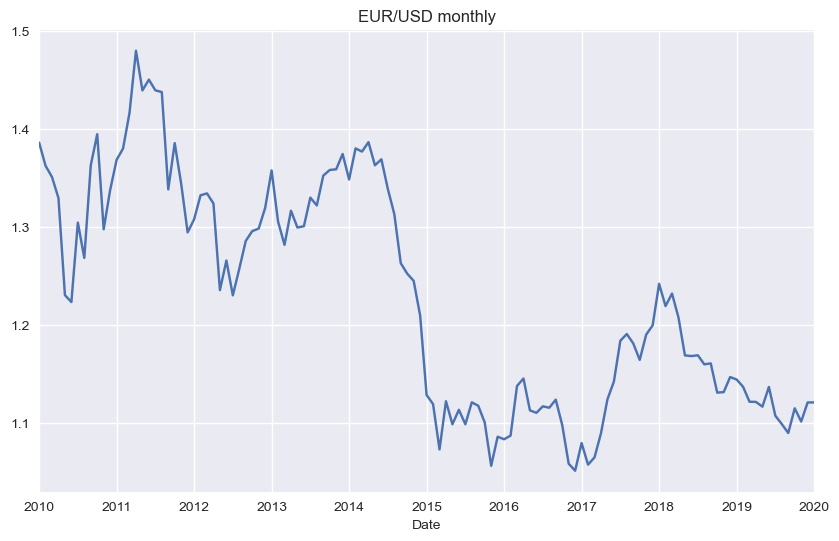

In [8]:
l.plot(figsize=(10, 6), title='EUR/USD monthly')

In [ ]:
l = l.values

In [11]:
l -= l.mean()
l

array([ 0.15702231,  0.13332231,  0.12182231,  0.10032231,  0.00132231,
       -0.00577769,  0.07532231,  0.03932231,  0.13382231,  0.16552231,
        0.06852231,  0.10852231,  0.13932231,  0.15092231,  0.18732231,
        0.25072231,  0.21022231,  0.22122231,  0.21032231,  0.20852231,
        0.10922231,  0.15642231,  0.11492231,  0.06532231,  0.07862231,
        0.10322231,  0.10512231,  0.09482231,  0.00642231,  0.03662231,
        0.00112231,  0.02832231,  0.05662231,  0.06662231,  0.06922231,
        0.09022231,  0.12862231,  0.07642231,  0.05262231,  0.08742231,
        0.07032231,  0.07162231,  0.10082231,  0.09282231,  0.12322231,
        0.12902231,  0.12972231,  0.14532231,  0.11932231,  0.15102231,
        0.14782231,  0.15742231,  0.13382231,  0.13992231,  0.10962231,
        0.08402231,  0.03392231,  0.02322231,  0.01582231, -0.01947769,
       -0.10057769, -0.10987769, -0.15617769, -0.10697769, -0.13047769,
       -0.11567769, -0.13047769, -0.10807769, -0.11157769, -0.12

In [14]:
f = np.linspace(-2, 2, len(l))
f

array([-2.        , -1.96666667, -1.93333333, -1.9       , -1.86666667,
       -1.83333333, -1.8       , -1.76666667, -1.73333333, -1.7       ,
       -1.66666667, -1.63333333, -1.6       , -1.56666667, -1.53333333,
       -1.5       , -1.46666667, -1.43333333, -1.4       , -1.36666667,
       -1.33333333, -1.3       , -1.26666667, -1.23333333, -1.2       ,
       -1.16666667, -1.13333333, -1.1       , -1.06666667, -1.03333333,
       -1.        , -0.96666667, -0.93333333, -0.9       , -0.86666667,
       -0.83333333, -0.8       , -0.76666667, -0.73333333, -0.7       ,
       -0.66666667, -0.63333333, -0.6       , -0.56666667, -0.53333333,
       -0.5       , -0.46666667, -0.43333333, -0.4       , -0.36666667,
       -0.33333333, -0.3       , -0.26666667, -0.23333333, -0.2       ,
       -0.16666667, -0.13333333, -0.1       , -0.06666667, -0.03333333,
        0.        ,  0.03333333,  0.06666667,  0.1       ,  0.13333333,
        0.16666667,  0.2       ,  0.23333333,  0.26666667,  0.3 

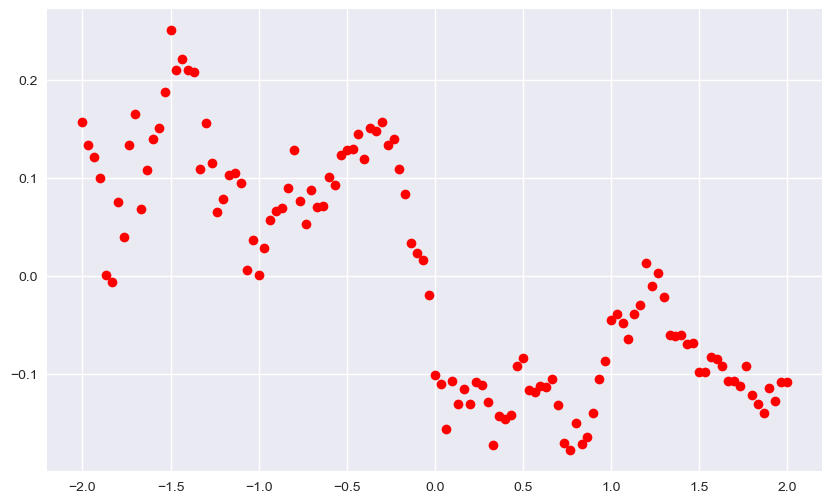

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')

In [16]:
def MSE(l, p):
    return np.mean((l - p) ** 2)

In [17]:
reg = np.polyfit(f, l, deg=5)
reg

array([-0.01910626, -0.0147182 ,  0.10990388,  0.06007211, -0.20833598,
       -0.03275423])

In [18]:
p = np.polyval(reg, f)
p

array([ 0.12088427,  0.11526131,  0.11080193,  0.10739461,  0.10493286,
        0.10331514,  0.10244475,  0.10222973,  0.10258281,  0.10342126,
        0.10466683,  0.10624564,  0.1080881 ,  0.1101288 ,  0.11230643,
        0.11456366,  0.11684709,  0.11910711,  0.12129784,  0.123377  ,
        0.12530587,  0.12704913,  0.12857481,  0.1298542 ,  0.1308617 ,
        0.1315748 ,  0.13197395,  0.13204243,  0.13176634,  0.13113443,
        0.13013803,  0.12877097,  0.12702948,  0.12491207,  0.12241947,
        0.11955452,  0.11632208,  0.11272891,  0.10878364,  0.1044966 ,
        0.09987977,  0.09494668,  0.0897123 ,  0.08419296,  0.07840627,
        0.07237098,  0.06610693,  0.05963494,  0.05297671,  0.04615473,
        0.03919218,  0.03211286,  0.02494106,  0.01770149,  0.01041918,
        0.00311939, -0.00417251, -0.0114311 , -0.01863101, -0.02574704,
       -0.03275423, -0.03962796, -0.04634406, -0.05287887, -0.05920936,
       -0.06531322, -0.07116897, -0.07675602, -0.08205478, -0.08

In [19]:
MSE(l, p)

0.0034166422957371025

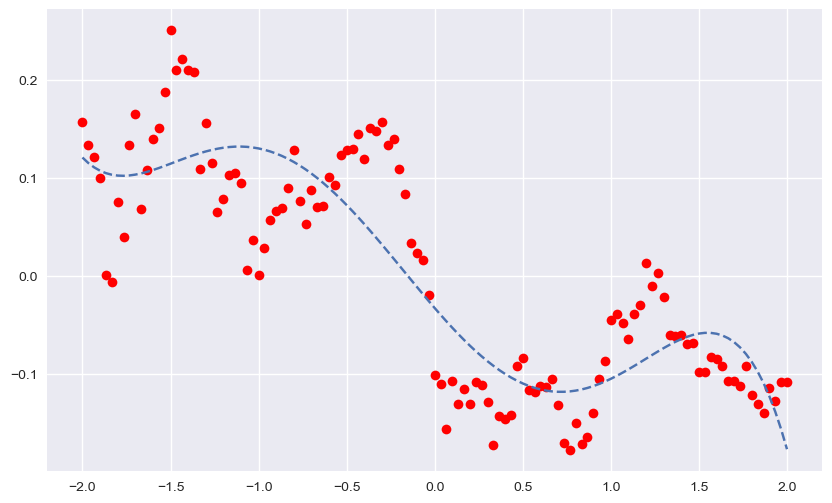

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.plot(f, p, '--')

In [21]:
for i in range(10, len(f) + 1, 20):
    reg = np.polyfit(f[:i], l[:i], deg=3)
    p = np.polyval(reg, f)
    mse = MSE(l, p)
    print(f'{i:3d} | MSE={mse}')

 10 | MSE=248628.10681598695
 30 | MSE=731.93822493046
 50 | MSE=12.236088505004364
 70 | MSE=0.7410590619743302
 90 | MSE=0.005743061730409335
110 | MSE=0.006492800939555574


In [192]:
import tensorflow as tf
tf.random.set_seed(100)
from keras.layers import Dense
from keras.models import Sequential
import keras

In [63]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               512       
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
hist = model.fit(f, l, epochs=1500, verbose=0)

Epoch 1/1500
4/4 [==============================] - 0s 787us/step - loss: 7.9377e-04
Epoch 2/1500
4/4 [==============================] - 0s 913us/step - loss: 0.0014
Epoch 3/1500
4/4 [==============================] - 0s 572us/step - loss: 0.0013
Epoch 4/1500
4/4 [==============================] - 0s 834us/step - loss: 0.0011
Epoch 5/1500
4/4 [==============================] - 0s 660us/step - loss: 9.3371e-04
Epoch 6/1500
4/4 [==============================] - 0s 589us/step - loss: 0.0011
Epoch 7/1500
4/4 [==============================] - 0s 633us/step - loss: 7.6298e-04
Epoch 8/1500
4/4 [==============================] - 0s 712us/step - loss: 0.0014
Epoch 9/1500
4/4 [==============================] - 0s 732us/step - loss: 7.7766e-04
Epoch 10/1500
4/4 [==============================] - 0s 643us/step - loss: 7.7409e-04
Epoch 11/1500
4/4 [==============================] - 0s 636us/step - loss: 0.0011
Epoch 12/1500
4/4 [==============================] - 0s 793us/step - loss: 0.0017
Epoch

In [65]:
p = model.predict(f).flatten()

4/4 [==============================] - 0s 643us/step


In [66]:
MSE(l, p)

0.0012925824246858059

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


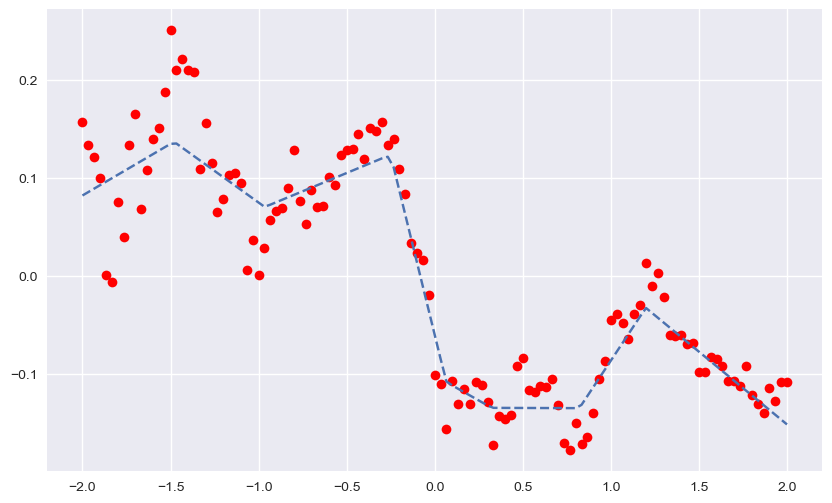

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.plot(f, p, '--')
plt.legend()

In [68]:
import pandas as pd

In [69]:
res = pd.DataFrame(hist.history)
res.tail()

,loss
1495,0.001338
1496,0.001563
1497,0.001574
1498,0.001444
1499,0.001812


<Axes: >

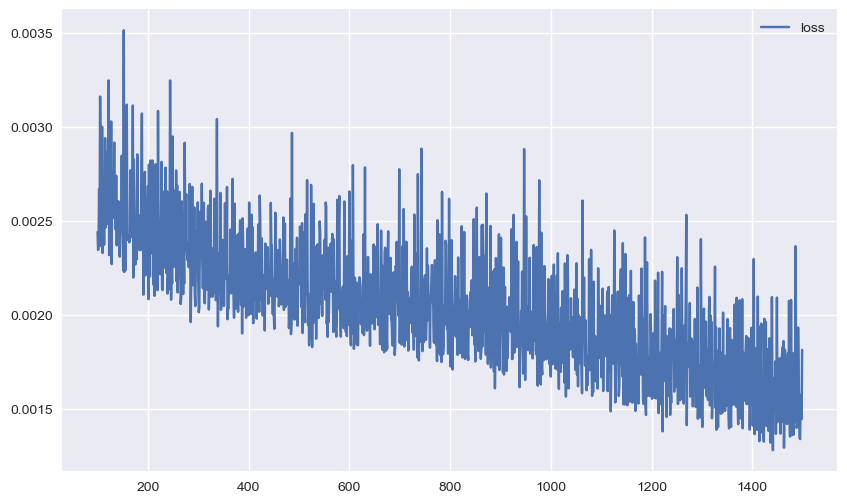

In [70]:
res.iloc[100:].plot(figsize=(10, 6))

In [114]:
def create_dnn_model(hl=1, hu=256):
    model = keras.models.Sequential()
    for _ in range(hl):
        model.add(Dense(hu, activation='relu', input_dim=1))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [115]:
model = create_dnn_model(3)
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 256)               512       
                                                                 
 dense_26 (Dense)            (None, 256)               65792     
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dense_28 (Dense)            (None, 1)                 257       
                                                                 
Total params: 132353 (517.00 KB)
Trainable params: 132353 (517.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model.fit(f, l, epochs=2500, verbose=False)

In [79]:
p = model.predict(f).flatten()

4/4 [==============================] - 0s 1ms/step


In [80]:
MSE(l, p)

0.00031775548054956447

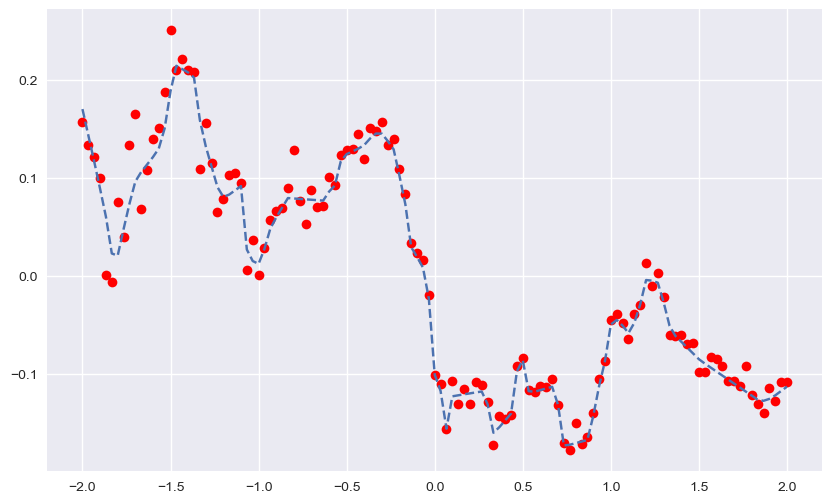

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro')
plt.plot(f, p, '--')

In [82]:
te = int(0.25 * len(f))
va = int(0.25 * len(f))

In [83]:
np.random.seed(100)

In [84]:
ind = np.arange(len(f))
ind

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120])

In [88]:
np.random.shuffle(ind)

In [89]:
ind_te = np.sort(ind[:te])
ind_va = np.sort(ind[te:te + va])
ind_tr = np.sort(ind[te + va:])

In [90]:
f_te = f[ind_te]
f_va = f[ind_va]
f_tr = f[ind_tr]

In [91]:
l_te = l[ind_te]
l_va = l[ind_va]
l_tr = l[ind_tr]

In [129]:
from keras.callbacks import EarlyStopping

In [130]:
model = create_dnn_model(2, 256)

In [131]:
callbacks = [EarlyStopping(monitor='loss',
                           patience=100,
                           restore_best_weights=True)]

In [132]:
hist = model.fit(f_tr, l_tr, epochs=3000, verbose=False,
          validation_data=(f_va, l_va),
          callbacks=callbacks)

1/1 [==============================] - 0s 8ms/step


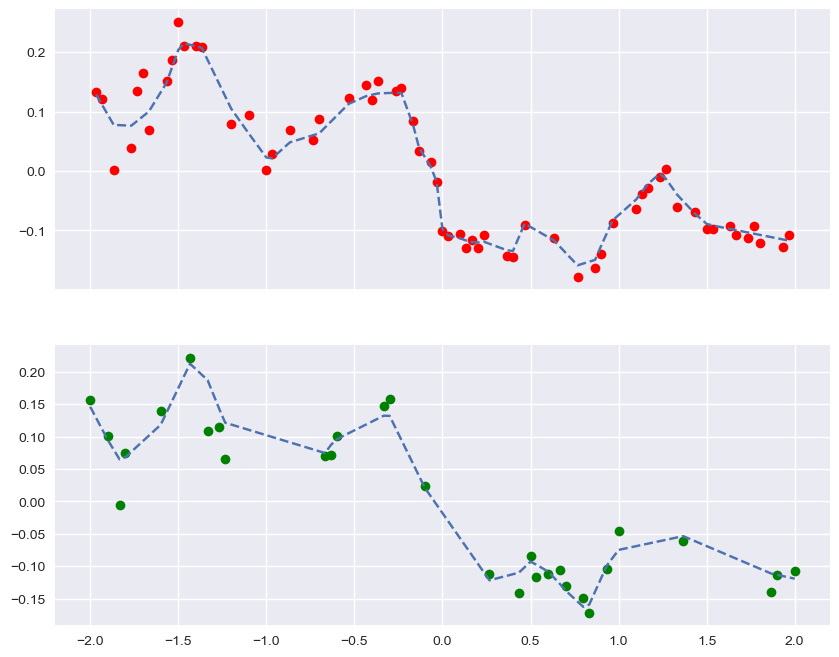

In [133]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(f_tr, l_tr, 'ro')
p = model.predict(f_tr)
ax[0].plot(f_tr, p, '--')

ax[1].plot(f_va, l_va, 'go')
p = model.predict(f_va)
ax[1].plot(f_va, p, '--')

In [134]:
res = pd.DataFrame(hist.history)

In [135]:
res.tail()

,loss,val_loss
1440,0.000738,0.000786
1441,0.000443,0.000863
1442,0.000582,0.000939
1443,0.000633,0.000963
1444,0.000552,0.000713


<Axes: >

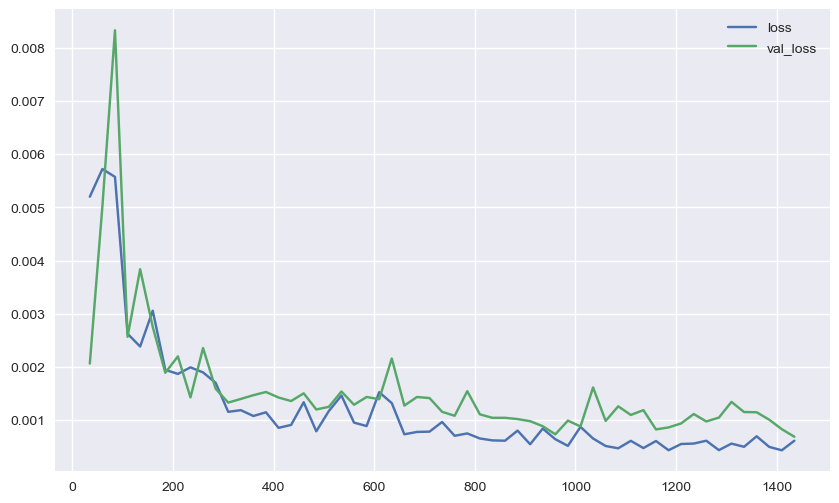

In [136]:
res.iloc[35::25].plot(figsize=(10, 6))

In [150]:
f_tr = f[:20:2]
l_tr = l[:20:2]

In [151]:
f_va = f[1:20:2]
l_va = l[1:20:2]

In [152]:
reg_b = np.polyfit(f_tr, l_tr, deg=1)
reg_v = np.polyfit(f_tr, l_tr, deg=9, full=True)[0]

In [160]:
reg_b

array([0.19592727, 0.46357868])

In [156]:
f_ = np.linspace(f_tr.min(), f_va.max(), 75)
f_

array([-2.        , -1.99144144, -1.98288288, -1.97432432, -1.96576577,
       -1.95720721, -1.94864865, -1.94009009, -1.93153153, -1.92297297,
       -1.91441441, -1.90585586, -1.8972973 , -1.88873874, -1.88018018,
       -1.87162162, -1.86306306, -1.8545045 , -1.84594595, -1.83738739,
       -1.82882883, -1.82027027, -1.81171171, -1.80315315, -1.79459459,
       -1.78603604, -1.77747748, -1.76891892, -1.76036036, -1.7518018 ,
       -1.74324324, -1.73468468, -1.72612613, -1.71756757, -1.70900901,
       -1.70045045, -1.69189189, -1.68333333, -1.67477477, -1.66621622,
       -1.65765766, -1.6490991 , -1.64054054, -1.63198198, -1.62342342,
       -1.61486486, -1.60630631, -1.59774775, -1.58918919, -1.58063063,
       -1.57207207, -1.56351351, -1.55495495, -1.5463964 , -1.53783784,
       -1.52927928, -1.52072072, -1.51216216, -1.5036036 , -1.49504505,
       -1.48648649, -1.47792793, -1.46936937, -1.46081081, -1.45225225,
       -1.44369369, -1.43513514, -1.42657658, -1.41801802, -1.40

In [159]:
np.polyval(reg_b, f_)

array([0.07172413, 0.07340099, 0.07507784, 0.0767547 , 0.07843155,
       0.08010841, 0.08178526, 0.08346212, 0.08513897, 0.08681583,
       0.08849268, 0.09016954, 0.09184639, 0.09352325, 0.0952001 ,
       0.09687696, 0.09855381, 0.10023067, 0.10190752, 0.10358438,
       0.10526123, 0.10693809, 0.10861494, 0.1102918 , 0.11196865,
       0.11364551, 0.11532236, 0.11699922, 0.11867607, 0.12035293,
       0.12202978, 0.12370664, 0.12538349, 0.12706035, 0.1287372 ,
       0.13041406, 0.13209091, 0.13376777, 0.13544462, 0.13712148,
       0.13879833, 0.14047519, 0.14215204, 0.1438289 , 0.14550575,
       0.14718261, 0.14885946, 0.15053632, 0.15221317, 0.15389003,
       0.15556688, 0.15724374, 0.15892059, 0.16059745, 0.1622743 ,
       0.16395116, 0.16562801, 0.16730487, 0.16898172, 0.17065858,
       0.17233543, 0.17401229, 0.17568914, 0.177366  , 0.17904285,
       0.18071971, 0.18239656, 0.18407342, 0.18575027, 0.18742713,
       0.18910398, 0.19078084, 0.19245769, 0.19413455, 0.19581

(-0.2, 0.6055356055498123)

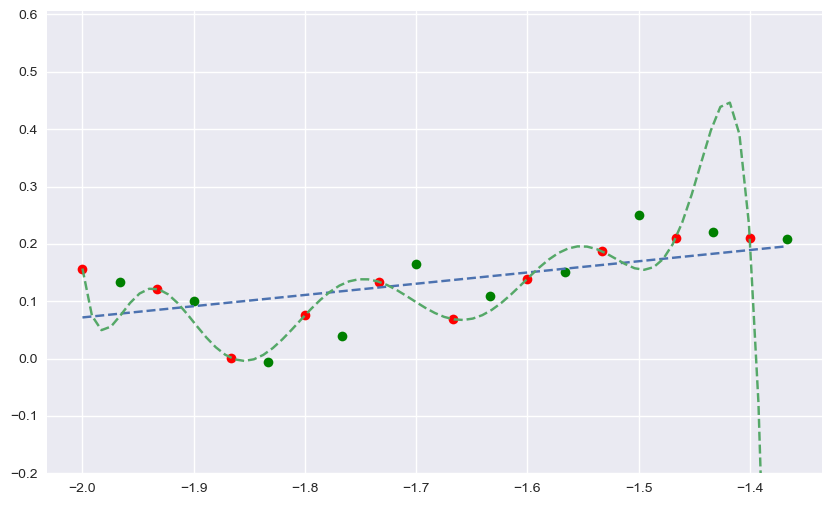

In [162]:
plt.figure(figsize=(10, 6))
plt.plot(f_tr, l_tr, 'ro')
plt.plot(f_va, l_va, 'go')
plt.plot(f_, np.polyval(reg_b, f_), '--')
plt.plot(f_, np.polyval(reg_v, f_), '--')
plt.ylim(-0.2)

In [163]:
from sklearn.metrics import r2_score

In [166]:
def evaluate(reg, f, l):
    p = np.polyval(reg, f)
    bias = np.abs(l - p).mean()
    var = p.var()
    msg = f'MSE={MSE(l, p):.4f} | R2={r2_score(l, p):.4f} | '
    msg += f'bias={bias:.4f} | var={var:.4f}'
    print(msg)

In [167]:
evaluate(reg_b, f_tr, l_tr)

MSE=0.0026 | R2=0.3484 | bias=0.0423 | var=0.0014


In [168]:
evaluate(reg_b, f_va, l_va)

MSE=0.0032 | R2=0.4498 | bias=0.0460 | var=0.0014


In [169]:
evaluate(reg_v, f_tr, l_tr)

MSE=0.0000 | R2=1.0000 | bias=0.0000 | var=0.0040


In [171]:
evaluate(reg_v, f_va, l_va)

MSE=0.8753 | R2=-149.2780 | bias=0.3565 | var=0.7539


In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [173]:
def PolynomialRegression(degree=None, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [174]:
np.set_printoptions(suppress=True, formatter={'float': lambda x: f'{x: 12.2f}'})

In [188]:
print('\nCross-validation scores')
print(74 * '=')
for deg in range(0, 10, 1):
    model = PolynomialRegression(deg)
    cvs = cross_val_score(model, f.reshape(-1, 1), l, cv=5)
    print(f'deg={deg} | ' + str(cvs.round(2)))


Cross-validation scores
deg=0 | [       -6.07        -7.34        -0.09        -6.32        -8.69]
deg=1 | [       -0.28        -1.40         0.16        -1.66        -4.62]
deg=2 | [       -3.48        -2.45         0.19        -1.57       -12.94]
deg=3 | [       -0.00        -1.24         0.32        -0.48       -43.62]
deg=4 | [     -222.81        -2.88         0.37        -0.32      -496.61]
deg=5 | [     -143.67        -5.85         0.49         0.12     -1241.04]
deg=6 | [    -4038.96       -14.71         0.49        -0.33      -317.32]
deg=7 | [    -9937.83       -13.98         0.64         0.22    -18725.61]
deg=8 | [    -3514.36       -11.22        -0.15        -6.29   -298744.18]
deg=9 | [    -7454.15        -0.91         0.15        -0.41    -13580.75]


In [186]:
f.reshape(-1, 1)[0]
# f[0]

array([       -2.00])

In [190]:
np.random.seed(100)
tf.random.set_seed(100)

In [193]:
from scikeras.wrappers import KerasRegressor

In [204]:
model = KerasRegressor(build_fn=create_dnn_model,
                       verbose=False, epochs=1000,
                       hl=1, hu=36)

In [205]:
cross_val_score(model, f.reshape(-1, 1), l, cv=5)

/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X,

array([       -4.60,        -3.26,         0.78,        -0.01,
             -21.32])

In [200]:
model = KerasRegressor(build_fn=create_dnn_model,
                       verbose=False, epochs=1000,
                       hl=3, hu=256)

In [203]:
cross_val_score(model, f.reshape(-1, 1), l, cv=5)

/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Users/taemin/anaconda3/lib/python3.10/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X,

array([      -15.57,        -0.23,         0.73,         0.29,
             -25.46])